In [1]:
import pandas as pd
import seaborn as sns
import os,io
import time
from collections import defaultdict

import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
#sns.set_context("notebook")
#sns.set(style="whitegrid",font_scale=1)
import matplotlib.collections as clt
import matplotlib

import tifffile
import nrrd
import numpy as np

import time


import h5py, hdf5plugin

import tqdm
import ptitprince as pt

In [2]:
font = {
        'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 7
        }

matplotlib.rc('font', **font)

In [3]:
data = pd.read_csv('benchmark.csv')
data['Dataset'] = [x.replace('fly', 'bitbow') for x in data['Dataset']]
data

,Unnamed: 0,Dataset,Compression Method,Compressed Size,Read Time,Write Time,Compression Ratio,Effective Compression Rate (MB/s),Effective Decompression Rate (MB/s)
0,727,segment,ZSTD_22,438884.0,0.062353,63.287657,152.982620,1.060896,1076.796298
1,637,segment,ZSTD_20,446986.0,0.061877,38.251916,150.209680,1.755249,1085.073506
2,728,segment,ZSTD_22,484161.0,0.062907,69.310611,138.676234,0.968706,1067.324046
3,547,segment,ZSTD_15,491818.0,0.060889,6.317049,136.517216,10.628637,1102.688790
4,638,segment,ZSTD_20,493096.0,0.062207,42.644877,136.163392,1.574436,1079.326149
...,...,...,...,...,...,...,...,...,...
3505,339,visium,LZ4,202168.0,0.000891,0.000892,0.994935,225.396496,225.697989
3506,337,visium,LZ4,202168.0,0.000917,0.000890,0.994935,225.879273,219.303115
3507,332,visium,LZ4,202168.0,0.000890,0.000903,0.994935,222.836525,225.879273
3508,333,visium,LZ4,202168.0,0.000887,0.000883,0.994935,227.708255,226.668212


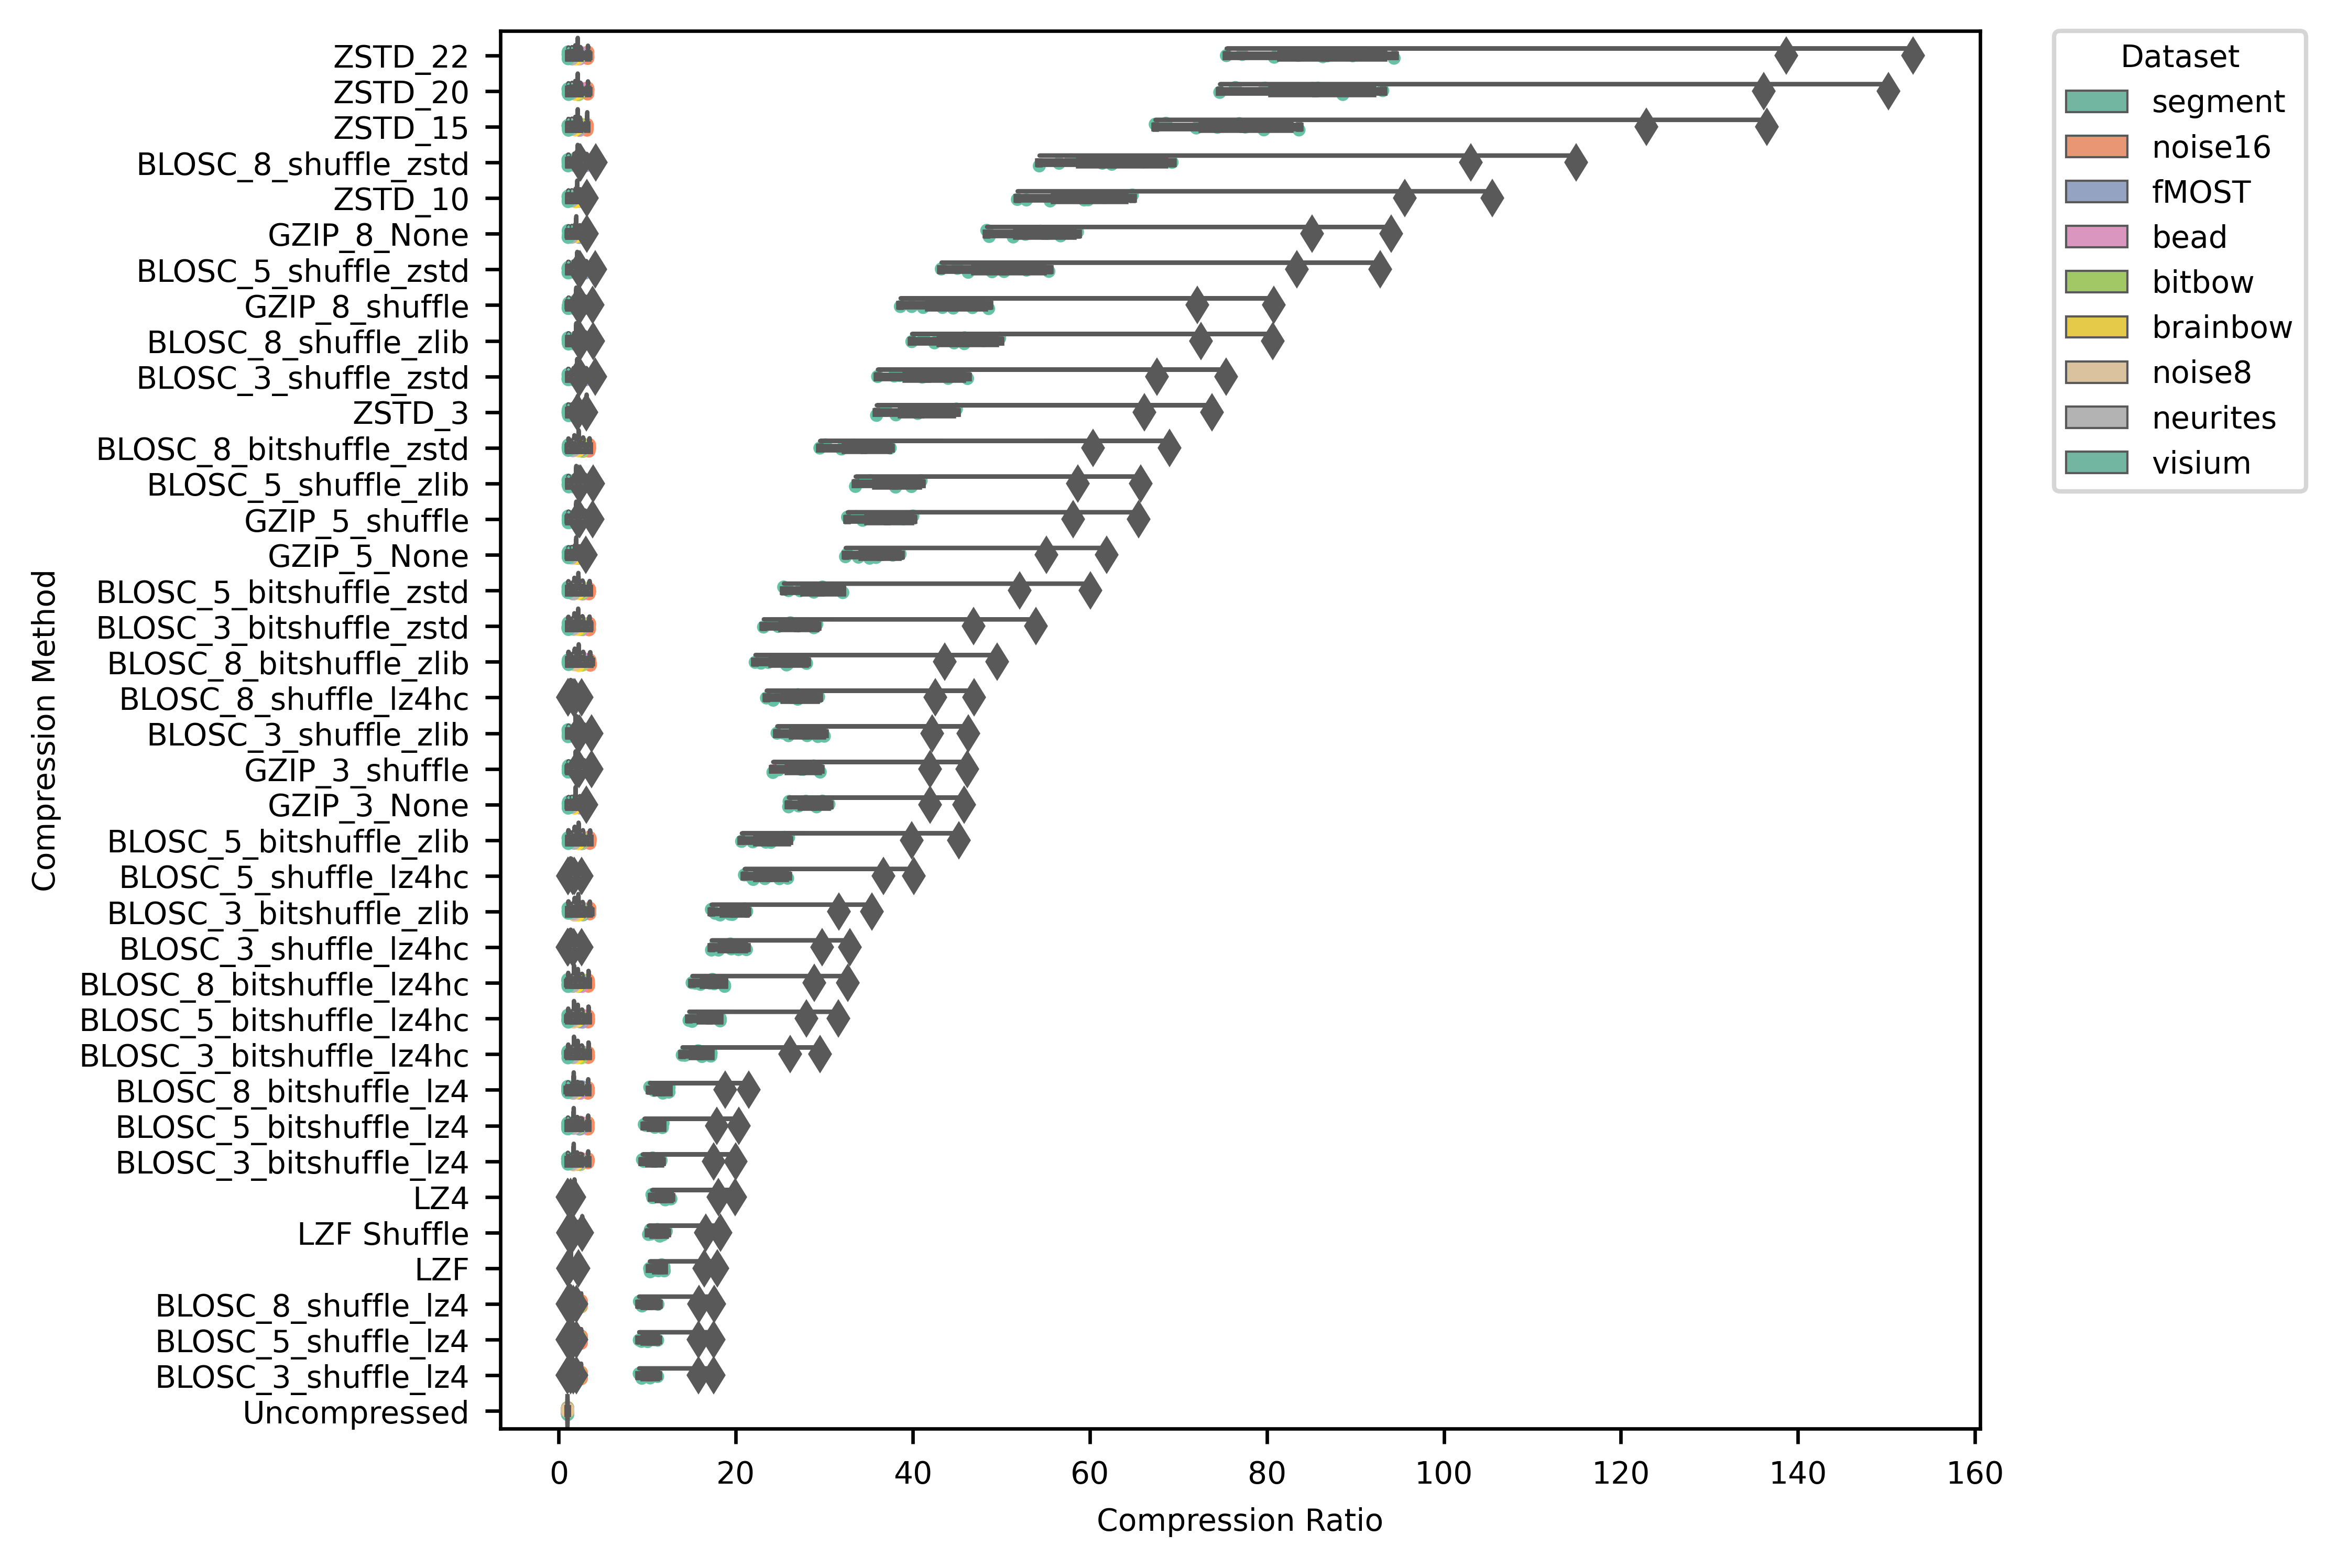

In [4]:
dy="Compressed Size" 
dy = 'Write Time'
dy = 'Compression Ratio'

dx= 'Compression Method'
hue = "Dataset"
ort="h"
pal = None # "Set2" #sns.color_palette(n_colors=1)

fig, ax  = plt.subplots(figsize=(7.5,5), dpi=600)

pt.RainCloud(
    x=dx, y=dy, hue=hue, data=data, ax=ax,
    orient='h', bw=.2, width_viol=.6
)

ax.set_xscale('linear')

fig.tight_layout()
fig.savefig('raincloud.pdf')


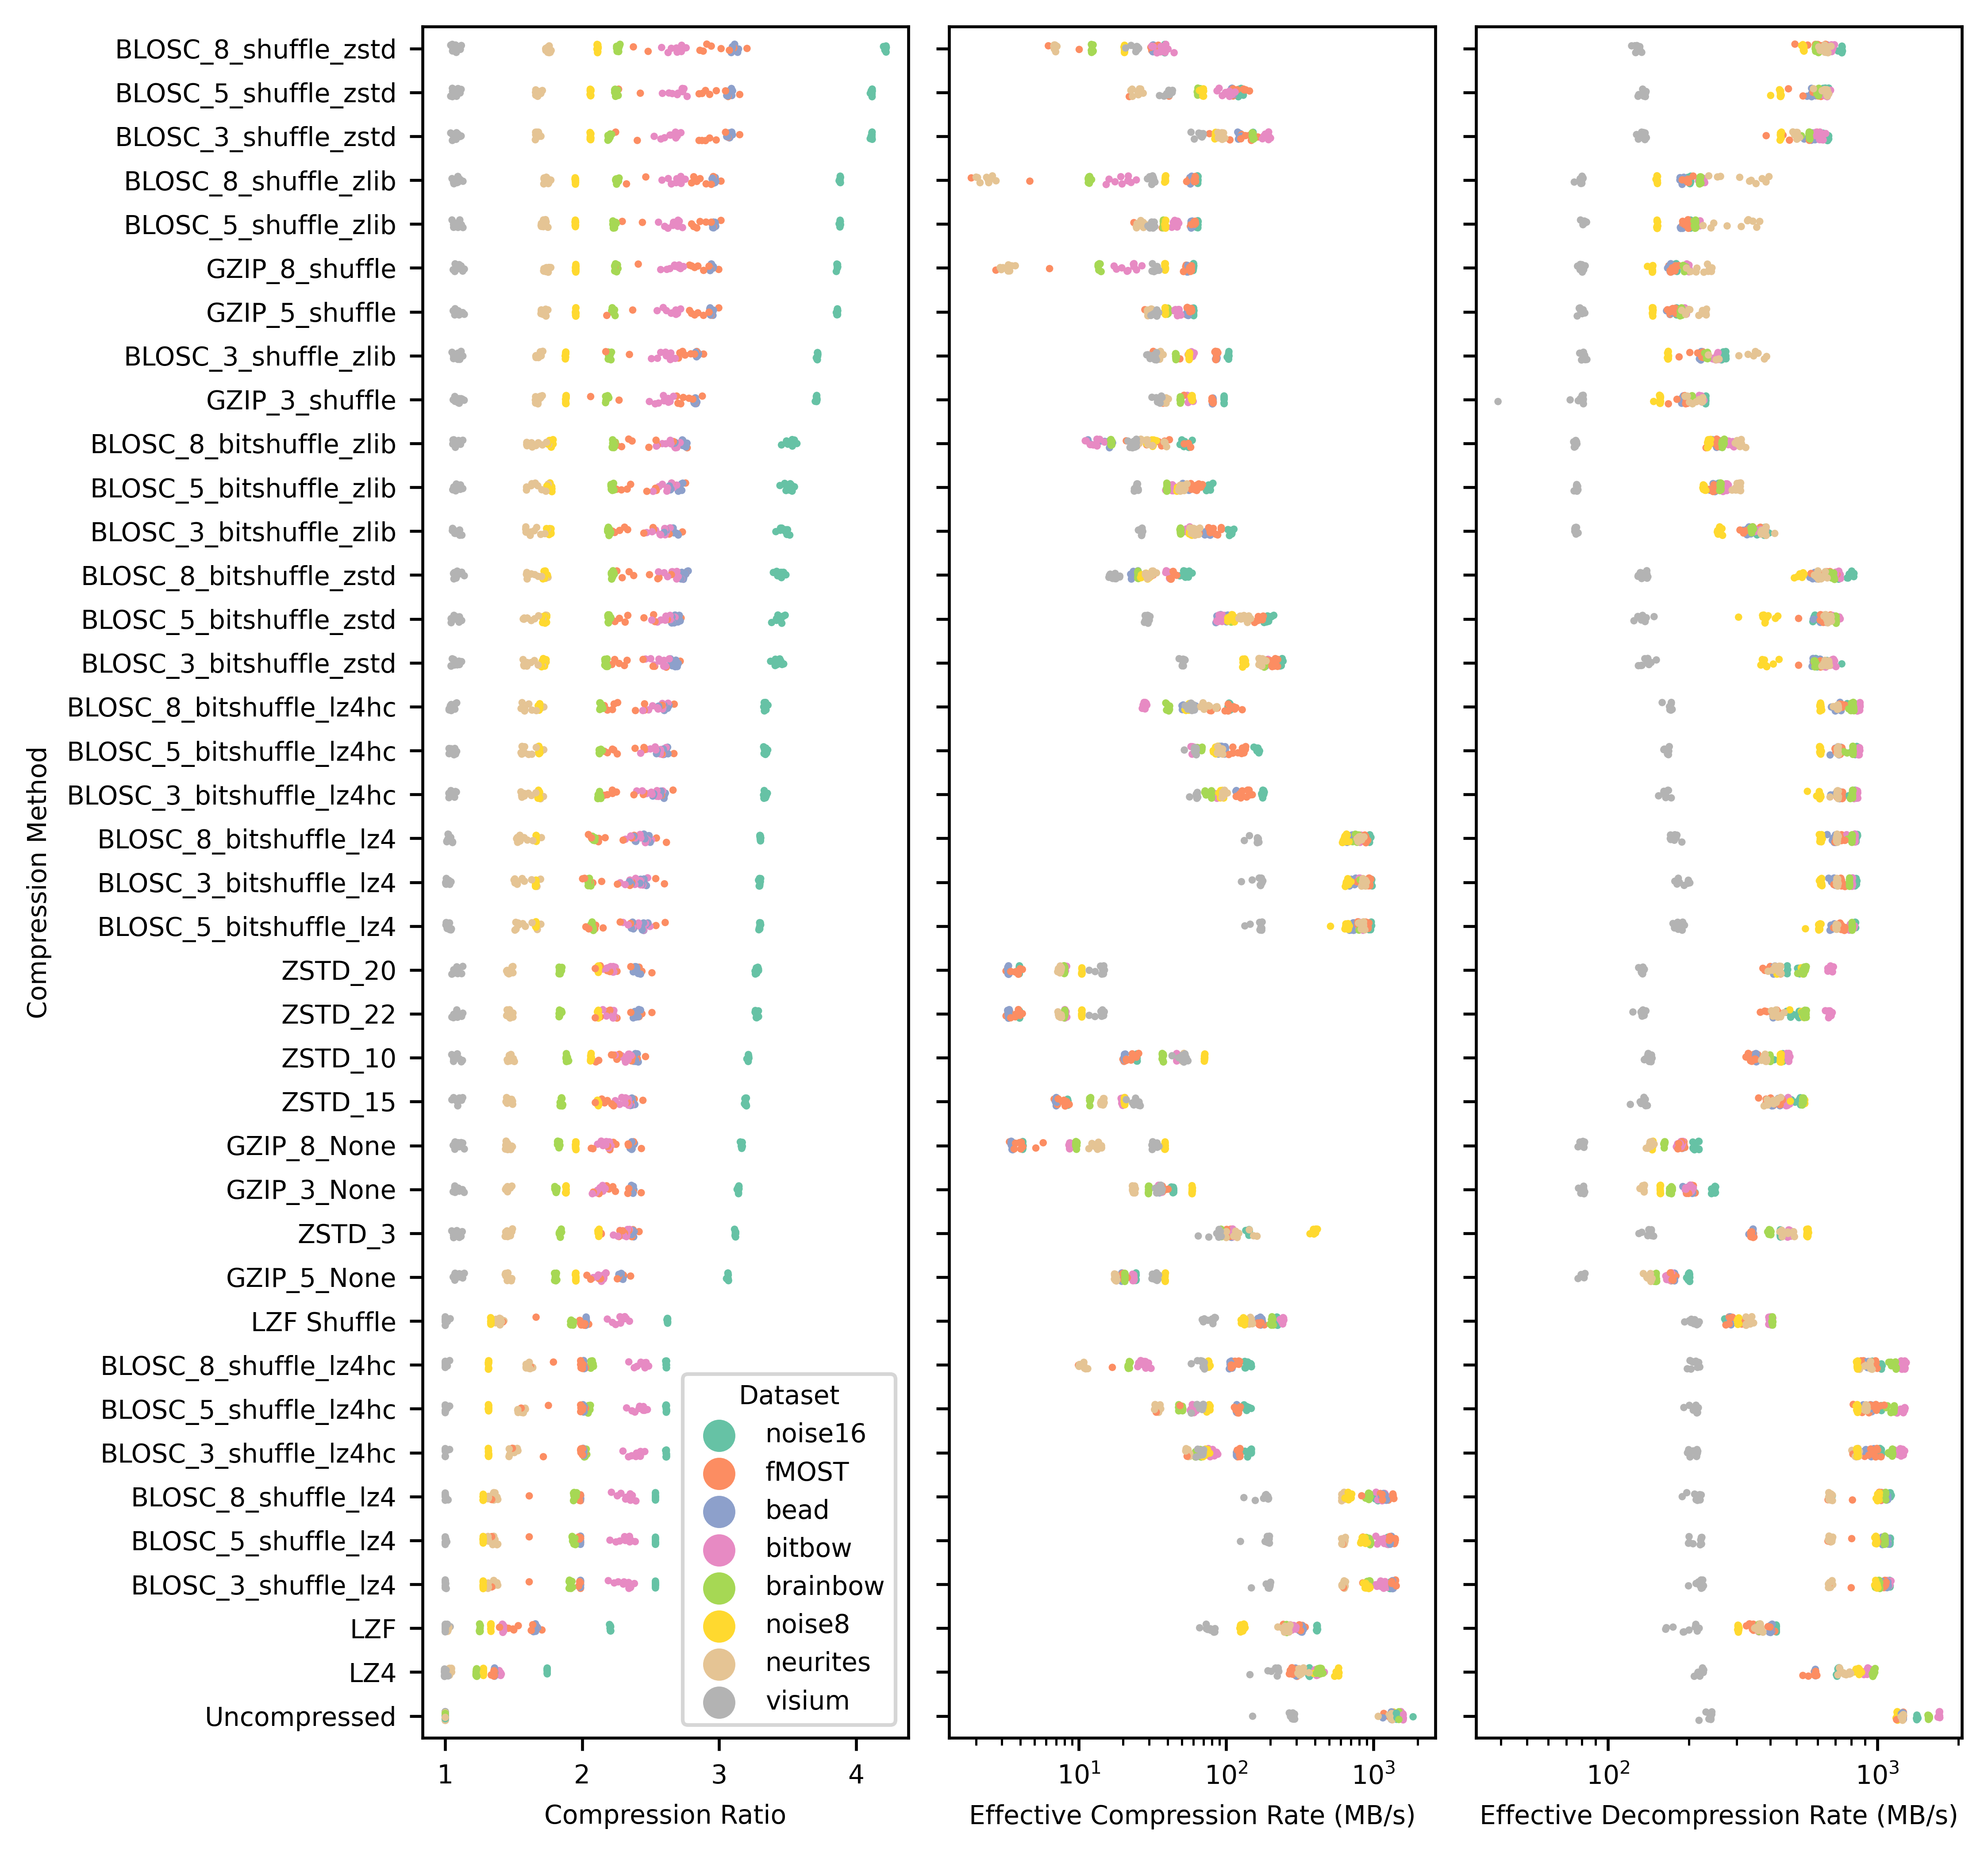

In [5]:
fig, ax  = plt.subplots(figsize=(7.5,7), dpi=600, ncols=3, sharey=True)

sns.set_palette('Set2')

toplot = data.sort_values(by=['Compression Ratio'], ascending=False)
toplot = toplot[toplot['Dataset'] != "segment"]
toplot = toplot[toplot['Compression Ratio'] < 6]

sns.stripplot(y='Compression Method', x="Compression Ratio", hue='Dataset', data=toplot, orient='h', size=2, jitter=1, marker='o', ax=ax[0])
sns.stripplot(y='Compression Method', x="Effective Compression Rate (MB/s)", hue='Dataset', data=toplot, orient='h', size=2, jitter=1, marker='o', ax=ax[1])
sns.stripplot(y='Compression Method', x="Effective Decompression Rate (MB/s)", hue='Dataset', data=toplot, orient='h', size=2, jitter=1, marker='o', ax=ax[2])
#sns.violinplot(y='Compression Method', x=x_plot, hue='Dataset', data=data.sort_values(by=[x_plot], ascending=False), orient='h', inner=None, linewidth=0, width=5)
#sns.despine(offset=10, trim=False)


ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[1].legend([],[], frameon=False)
ax[2].legend([],[], frameon=False)

ax[1].set_xscale('log')
ax[2].set_xscale('log')

#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

fig.tight_layout()
fig.savefig('compression_ratio.pdf')

In [6]:
data

,Unnamed: 0,Dataset,Compression Method,Compressed Size,Read Time,Write Time,Compression Ratio,Effective Compression Rate (MB/s),Effective Decompression Rate (MB/s)
0,727,segment,ZSTD_22,438884.0,0.062353,63.287657,152.982620,1.060896,1076.796298
1,637,segment,ZSTD_20,446986.0,0.061877,38.251916,150.209680,1.755249,1085.073506
2,728,segment,ZSTD_22,484161.0,0.062907,69.310611,138.676234,0.968706,1067.324046
3,547,segment,ZSTD_15,491818.0,0.060889,6.317049,136.517216,10.628637,1102.688790
4,638,segment,ZSTD_20,493096.0,0.062207,42.644877,136.163392,1.574436,1079.326149
...,...,...,...,...,...,...,...,...,...
3505,339,visium,LZ4,202168.0,0.000891,0.000892,0.994935,225.396496,225.697989
3506,337,visium,LZ4,202168.0,0.000917,0.000890,0.994935,225.879273,219.303115
3507,332,visium,LZ4,202168.0,0.000890,0.000903,0.994935,222.836525,225.879273
3508,333,visium,LZ4,202168.0,0.000887,0.000883,0.994935,227.708255,226.668212


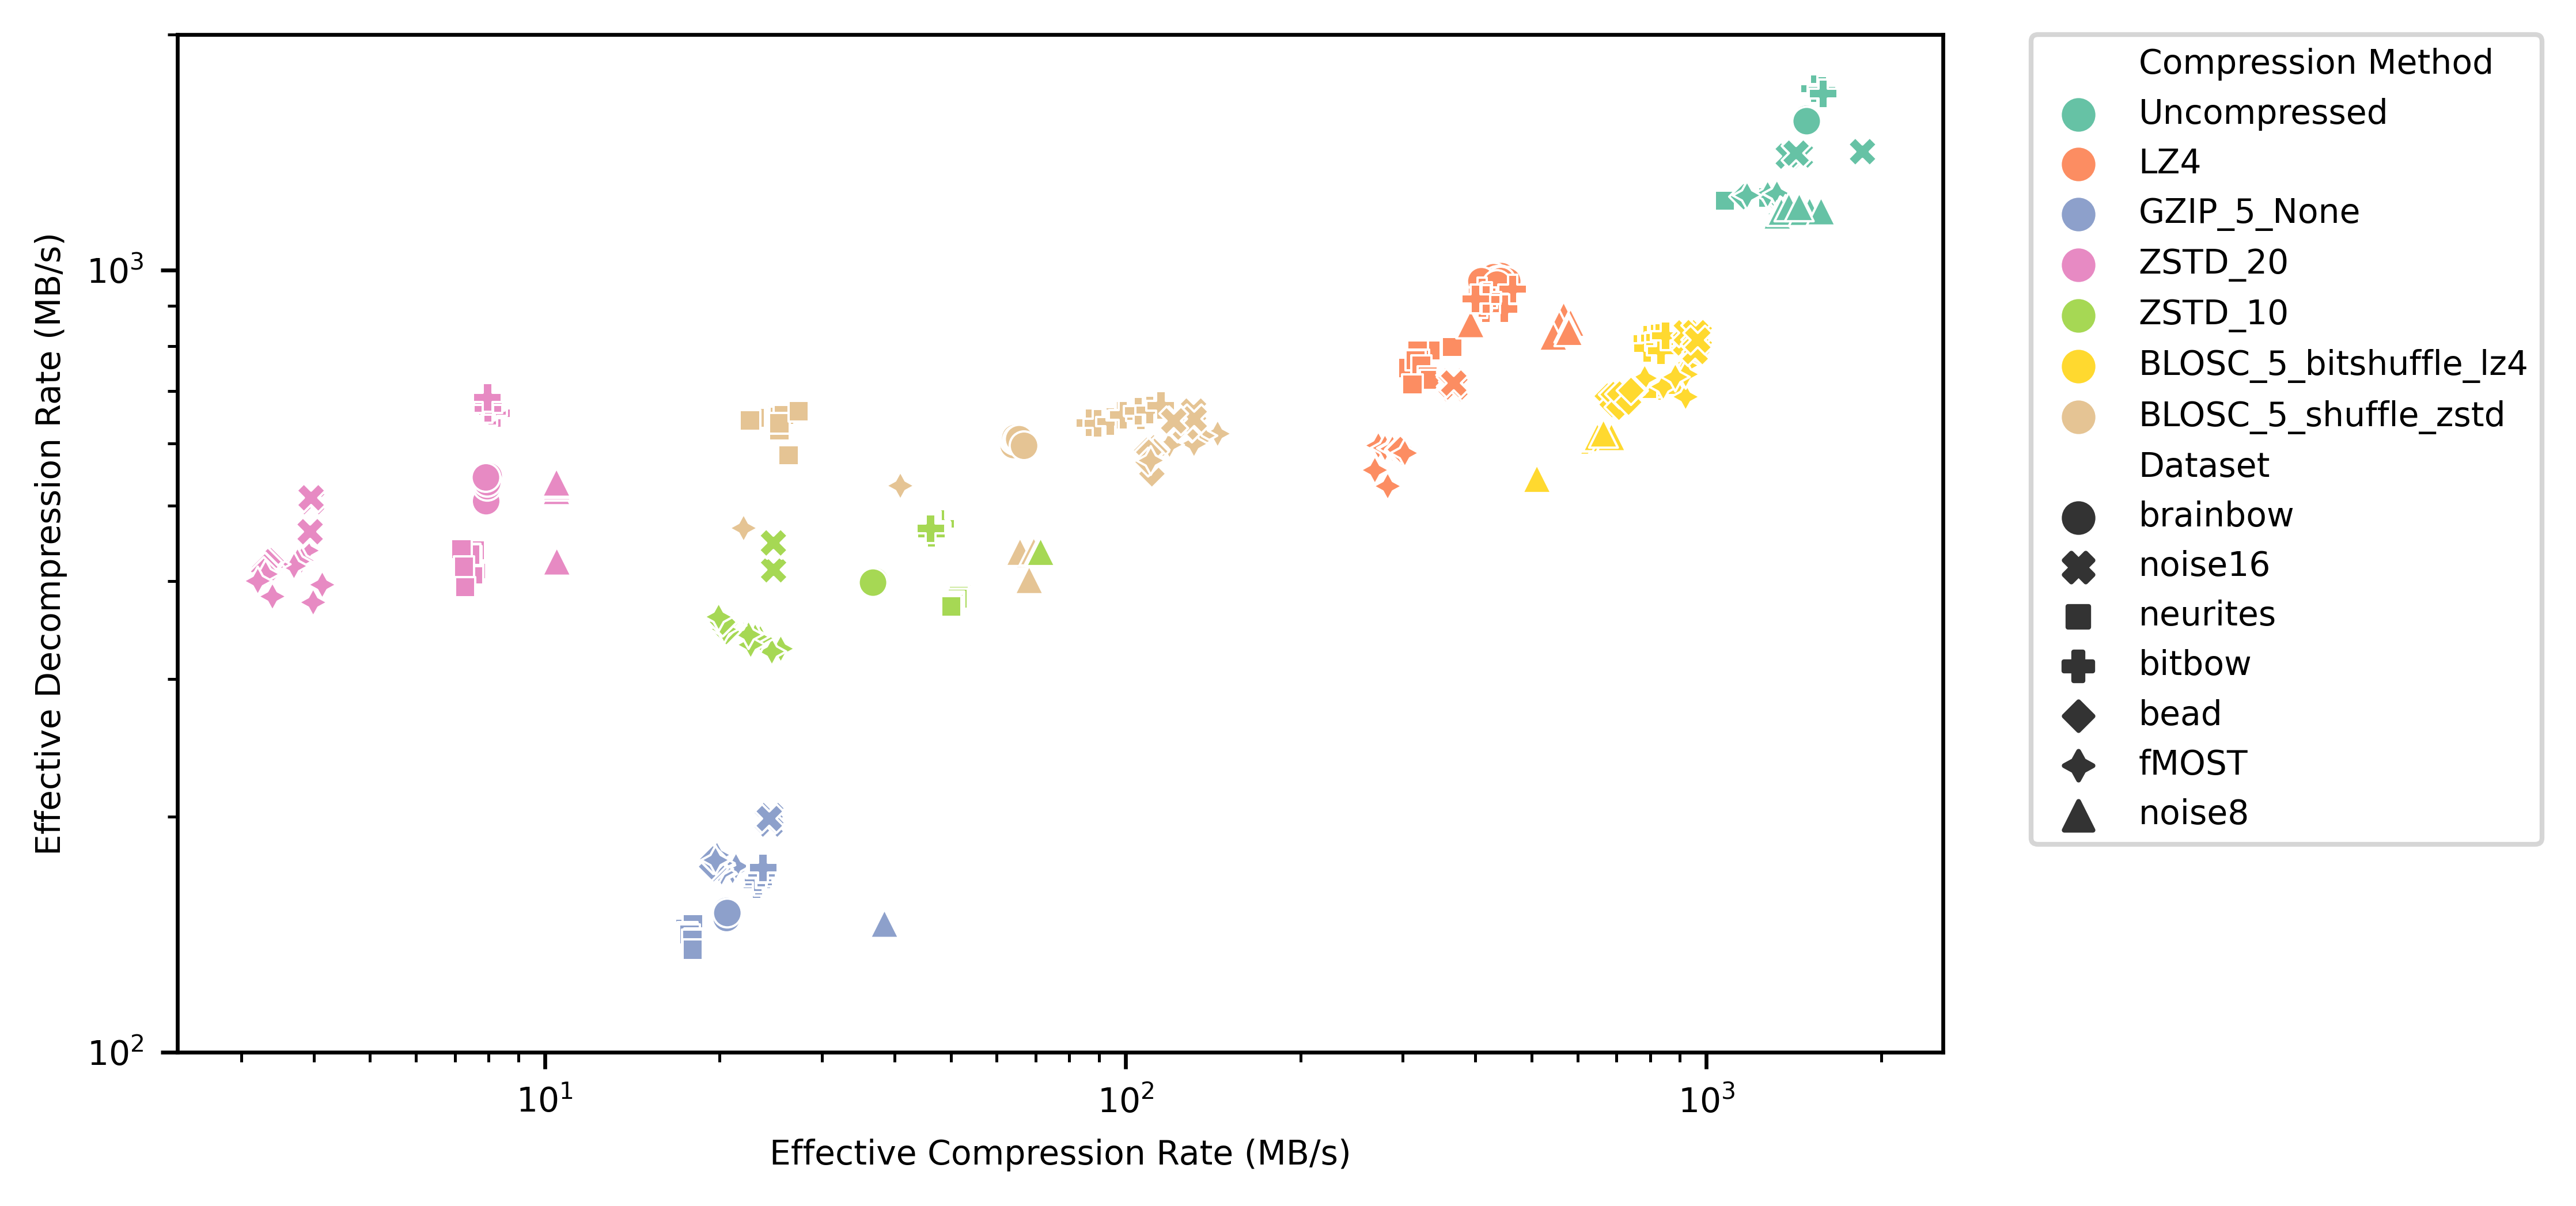

In [7]:
fig, ax  = plt.subplots(figsize=(7.5,3.5), dpi=600)

filter_list = [
    'Uncompressed',
    'LZ4',
    'BLOSC_5_bitshuffle_lz4',
    'BLOSC_5_shuffle_zstd',
    'GZIP_5_None',
    'ZSTD_10',
    'ZSTD_20'
]

toplot = data.sort_values(by=['Compression Ratio'], ascending=True)
toplot = toplot[~toplot['Dataset'].isin(['visium', 'segment'])]
toplot = toplot[toplot['Compression Method'].isin(filter_list)]


# Show the joint distribution using kernel density estimation
sns.scatterplot(
    data=toplot,
    x='Effective Compression Rate (MB/s)',
    y='Effective Decompression Rate (MB/s)',
    hue="Compression Method",
    style="Dataset"
)

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(10**2, 2*10**3)

fig.tight_layout()
fig.savefig('scatter_comparison.pdf')

In [8]:
summary = data[~data['Dataset'].isin(['segment', 'visium'])]

In [9]:
summary[summary['Compression Method'] == 'BLOSC_5_shuffle_zstd'].mean()

Unnamed: 0                             3.107357e+03
Compressed Size                        1.706314e+07
Read Time                              6.889047e-02
Write Time                             6.422920e-01
Compression Ratio                      2.675103e+00
Effective Compression Rate (MB/s)      8.632477e+01
Effective Decompression Rate (MB/s)    5.900147e+02
dtype: float64

In [10]:
summary[summary['Compression Method'] == 'BLOSC_5_shuffle_zstd'].std()

Unnamed: 0                             2.407900e+01
Compressed Size                        1.216240e+07
Read Time                              4.384139e-02
Write Time                             5.137330e-01
Compression Ratio                      7.508217e-01
Effective Compression Rate (MB/s)      3.629427e+01
Effective Decompression Rate (MB/s)    7.357809e+01
dtype: float64

In [11]:
summary[summary['Compression Method'] == 'BLOSC_8_bitshuffle_lz4'].mean()

Unnamed: 0                             1.847357e+03
Compressed Size                        1.926755e+07
Read Time                              5.470685e-02
Write Time                             5.328612e-02
Compression Ratio                      2.253933e+00
Effective Compression Rate (MB/s)      7.884515e+02
Effective Decompression Rate (MB/s)    7.425882e+02
dtype: float64

In [12]:
summary[summary['Compression Method'] == 'BLOSC_8_bitshuffle_lz4'].std()

Unnamed: 0                             2.407900e+01
Compressed Size                        1.283940e+07
Read Time                              3.360414e-02
Write Time                             3.592751e-02
Compression Ratio                      5.426498e-01
Effective Compression Rate (MB/s)      9.290307e+01
Effective Decompression Rate (MB/s)    7.453499e+01
dtype: float64

In [13]:
data[data['Dataset'] == 'segment'].groupby(by=['Compression Method']).mean().sort_values(by=['Compression Ratio'], ascending=False)

,Unnamed: 0,Compressed Size,Read Time,Write Time,Compression Ratio,Effective Compression Rate (MB/s),Effective Decompression Rate (MB/s)
Compression Method,,,,,,,
ZSTD_22,724.5,732769.0,0.064161,89.684479,96.594075,0.766167,1046.692863
ZSTD_20,634.5,742322.1,0.063931,59.635985,95.238864,1.169052,1050.573587
ZSTD_15,544.5,823242.0,0.062768,8.432474,85.956144,8.101345,1069.894182
BLOSC_8_shuffle_zstd,3154.5,1004416.9,0.076672,7.380211,70.864152,9.194230,876.441070
ZSTD_10,454.5,1067410.9,0.065800,3.875587,66.371099,17.329462,1020.780637
GZIP_8_None,994.5,1163162.8,0.146623,5.347753,60.521088,12.603737,461.658134
BLOSC_5_shuffle_zstd,3064.5,1255140.4,0.077522,3.883793,56.841811,17.294383,867.981577
BLOSC_8_shuffle_zlib,2614.5,1382958.3,0.208130,5.928050,51.097860,11.411407,322.701165
GZIP_8_shuffle,1264.5,1419684.4,0.242056,5.707868,50.036306,11.833307,277.454658
